## Regression Modelling using Insurance Dataset

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

#### Add dataset

In [5]:
df=pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# data types and Null values for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Check for duplicates
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [10]:
# Check for unique values across columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [13]:
# shape and size
print((df.shape), df.size)

(1337, 7) 9359


### Exploratory Data Analysis

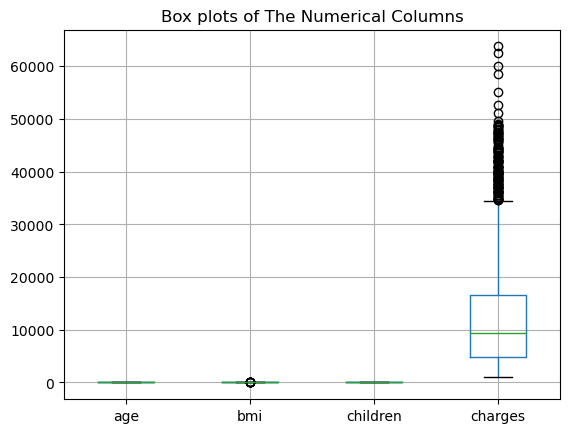

In [14]:
# Visualize the box plots for numerical columns only
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plots of The Numerical Columns')
plt.show()

In [15]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

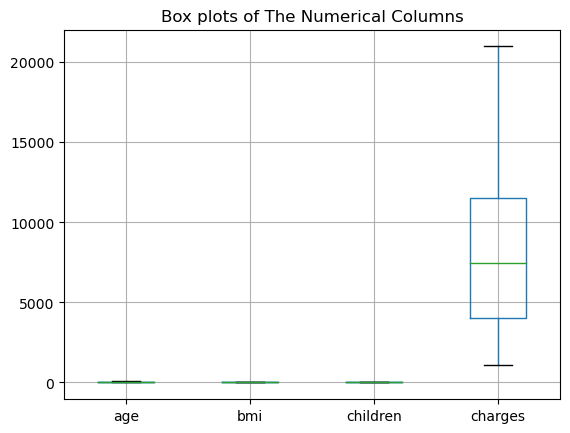

In [16]:
# Visualize the box plots for numerical columns only
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plots of The Numerical Columns')
plt.show()

In [17]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


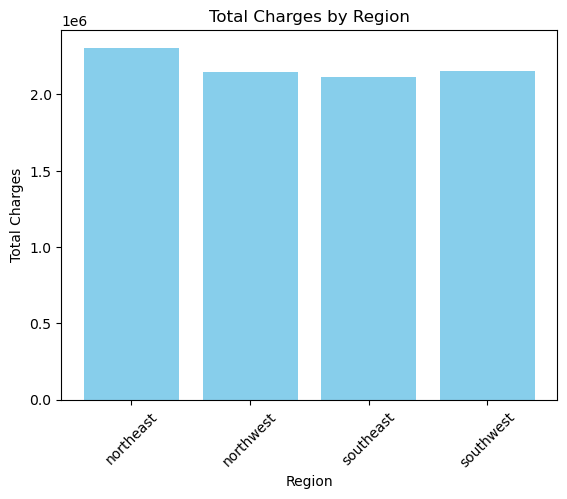

In [20]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='skyblue')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

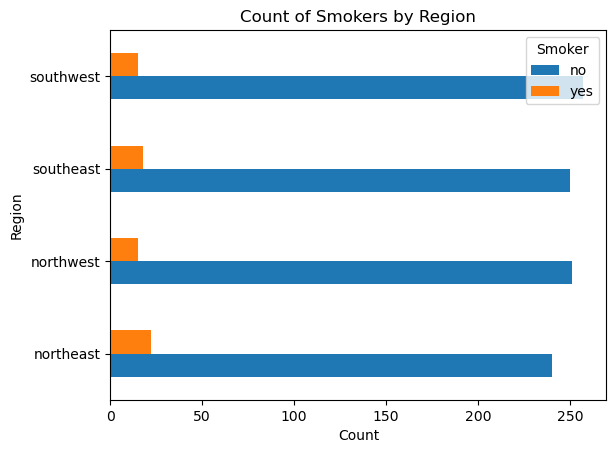

In [21]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

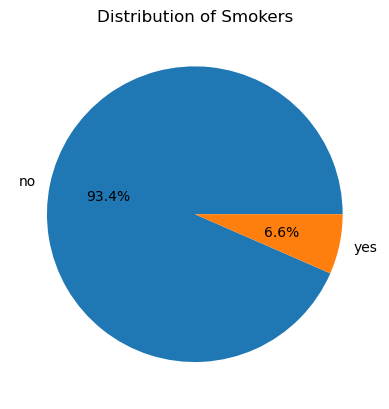

In [22]:
smoker_counts = df_cleaned['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

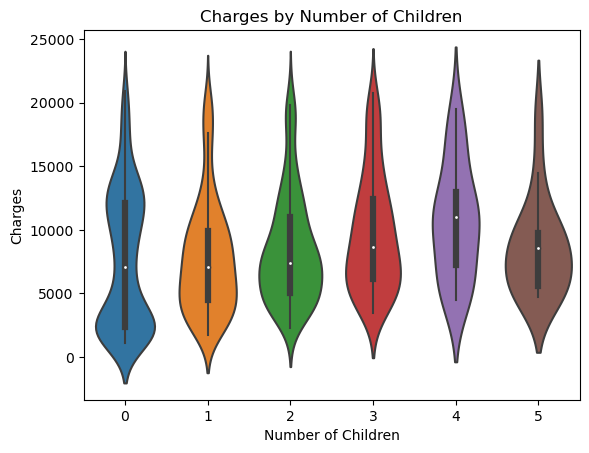

In [23]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()